In [1]:
import numpy as np
import scipy.stats as st
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import matplotlib.pylab as plt
from corner import corner
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

In [2]:
def pdf(x):
    return st.loggamma(c = 0.1,loc=-3).pdf(-x)

sample = -st.loggamma(c = 0.1,loc=-3).rvs(5000)

print('Checking the PDF is normalized:',quad(pdf,0,100)[0])

def CIcalc(tau, mode, pdf):
    def lofunc(x):
        if (x < mode) & (x > 0.0):
            return pdf(x) - tau
        else:
            return 1000.0
    
    def hifunc(x):
        if (x > mode) & (x < 80):
            return pdf(x) - tau
        else:
            return 1000.0

    lolim = fsolve(lofunc,mode*0.9)
    uplim = fsolve(hifunc,mode*1.1)
    ci = quad(pdf,lolim, uplim)[0]*100
    print(f'Confidence interval(%): {ci:.3}')
    return lolim[0], uplim[0]


Checking the PDF is normalized: 0.9999355826377029


Confidence interval(%): 68.4


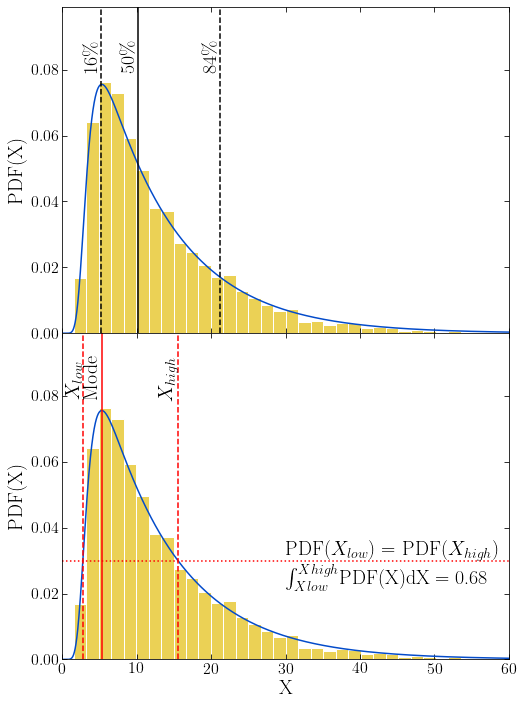

In [3]:
x = np.linspace(-10,100,10000)
y = pdf(x)
ci_lolim, ci_uplim = CIcalc(0.03, x[np.argmax(y)], pdf)

fig = plt.figure(figsize=(8,12))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(x,y,color=colorset[4])
ax1.hist(sample,density=True,bins=50,color=colorset[12],edgecolor='w')
ax1.axvline(np.quantile(sample,0.16),linestyle='--',color='k')
ax1.annotate(r'16\%',[np.quantile(sample,0.16),0.08],rotation=90,fontsize=20,ha='right')
ax1.axvline(np.quantile(sample,0.50),linestyle='-',color='k')
ax1.annotate(r'50\%',[np.quantile(sample,0.50),0.08],rotation=90,fontsize=20,ha='right')
ax1.axvline(np.quantile(sample,0.84),linestyle='--',color='k')
ax1.annotate(r'84\%',[np.quantile(sample,0.84),0.08],rotation=90,fontsize=20,ha='right')
ax1.set_xlim(0,60)
ax1.set_ylim(0,0.099)
ax1.set_ylabel('PDF(X)', fontsize=20)
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=2.5)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2 = fig.add_subplot(2,1,2)
ax2.plot(x,y,color=colorset[4])
ax2.hist(sample,density=True,bins=50,color=colorset[12],edgecolor='w')
ax2.axhline(0.03,linestyle=':',color='r')
ax2.annotate(r'PDF($X_{low}$) = PDF($X_{high}$)',[30,0.03],fontsize=20,va='bottom')
ax2.annotate(r'$\int_{Xlow}^{Xhigh}$PDF(X)dX = 0.68',[30,0.029],fontsize=20,va='top')
ax2.axvline(ci_lolim,linestyle='--',color='r')
ax2.annotate(r'$X_{low}$',[ci_lolim,0.08],rotation=90,fontsize=20,ha='right')
ax2.axvline(x[np.argmax(y)],linestyle='-',color='r')
ax2.annotate(r'Mode',[np.quantile(sample,0.16),0.08],rotation=90,fontsize=20,ha='right')
ax2.axvline(ci_uplim,linestyle='--',color='r')
ax2.annotate(r'$X_{high}$',[ci_uplim,0.08],rotation=90,fontsize=20,ha='right')
ax2.set_xlim(0,60)
ax2.set_ylim(0,0.099)
ax2.set_xlabel('X',fontsize=20)
ax2.set_ylabel('PDF(X)', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=2.5)
ax2.tick_params(axis='both', which='both',direction='in',right=True,top=True)
fig.subplots_adjust(hspace=0.0)
fig.savefig('quantiles_demo.pdf',bbox_inches='tight')